# Estimação(Cap8) - Pense Estatística, $2^o$ Edição.

## Universidade Federal de Alagoas - UFAL
## Centro de Tecnologia - CTEC
## Programa de Pós-Graduação Recursos Hídricos e Saneamento - PPGRHS
### Disciplina de Estatística

Clebson Farias

![](estimação.png)

- **Estimação pontual**: Único valor numérico a um certo parâmetro populacional, a partir de estatísticas amostrais;
- **Estimação por intervalos**:  Utiliza as informações contidas na amostra.

## Propriedades dos estimadores
- **Estimadores sem viés**,  média das estimativas seja igual ao valor populacional do parâmetro;
- **Estimadores consistentes**, ;
- **Estimadores eficientes**, a variância do estimador é menor do que qualquer outro estimador;
- **Estimador suficiente**, usa toda a informação contida na amostra;

Esses fundamentos são usados para selecionar o estimador mais apropriados, uma vez que não podemos dizer que um estimador é melhor ou pior que o outro;

## Estimadores
Há uma variedade de métodos de estimação de parâmetros:

- **Método dos momentos (MOM):** 
    - Método de estimação mais simples;
    - Qualidade inferior e menos eficientes do que os estimadores de MVS, particularmente para distribuições de três ou mais parâmetros;
    - Para pequenas amostras são comparáveis ou até mesmo superiores aos de outros estimadores.
- **Método dos momentos-L (MML):**
    - Estimadores de parâmetros comparáveis, em qualidade, àqueles produzidas pelo método da MVS;
    - Para pequenas amostras são com alguma freqüência, mais acurados do que os de MVS.
- **Método da máxima verossimilhança (MVS):**
    - Considerado o método de estimação mais eficiente;
    - É apenas assintótica, para pequenas amostras os  estimadores são de qualidade comparável ou inferior a outros métodos;
    - Consistentes, suficientes e assintóticamente sem viés;


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
import estimation

In [2]:
#Dados Manso
dados = pd.read_csv("manso.csv", index_col=0, parse_dates=True)
dados.head()

,1455008,66210000,66231000,MANSO
1931-01-01,NaN,NaN,NaN,NaN
1931-01-02,NaN,NaN,NaN,NaN
1931-01-03,NaN,NaN,NaN,NaN
1931-01-04,NaN,NaN,NaN,NaN
1931-01-05,NaN,NaN,NaN,NaN


## O jogo da estimação

In [3]:
#Deleta todas as linhas com valor NaN
dados_naturais = dados.MANSO.dropna(axis=0, how='all')
dados_naturais.head()

1982-01-01    243.0
1982-01-02    329.0
1982-01-03    290.0
1982-01-04    300.0
1982-01-05    386.0
Name: MANSO, dtype: float64

![](boxplot.png)

In [4]:
def remove_outlier(dados):
    Q1 = dados.quantile(0.25)
    Q3 = dados.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((dados < (Q1 - 1.5 * IQR)) |(dados > (Q3 + 1.5 * IQR)))
    return dados[trueList]

dados_less_outliers = remove_outlier(dados_naturais)

In [5]:
import calendar as cal

def month_start_year_hydrologic(dados):
    mean_month = [dados.loc[dados.index.month == i].mean() for i in range(1, 13)]
    month_start_year_hydrologic = 1 + mean_month.index(min(mean_month))
    month_start_year_hydrologic_abr = cal.month_abbr[month_start_year_hydrologic].upper()
    month_num = month_start_year_hydrologic
    month_abr = month_start_year_hydrologic_abr
    
    return month_num, month_abr

month_start_year_hydrologic = month_start_year_hydrologic(dados_less_outliers)
print('Ínicio do ano hidrológico: ', month_start_year_hydrologic)

Ínicio do ano hidrológico:  (8, 'AUG')


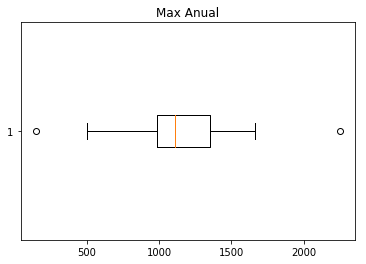

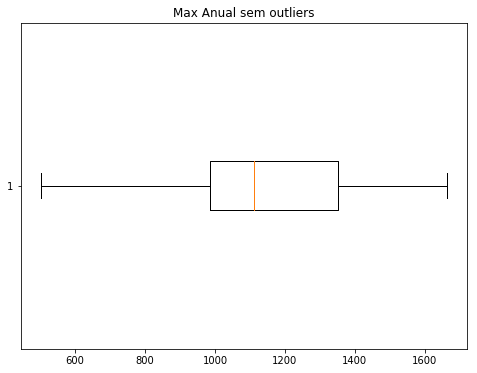

<Figure size 576x432 with 0 Axes>

In [6]:
def annual(dados, month_start_year_hydrologic):
    data_by_year_hydrologic = dados.groupby(pd.Grouper(freq='AS-%s' % month_start_year_hydrologic[1]))
    max_vazao = data_by_year_hydrologic.max().values
    idx_vazao = data_by_year_hydrologic.idxmax().values

    peaks = pd.DataFrame(max_vazao, index=idx_vazao, columns=['Flow'])
    return peaks

max_annual = annual(dados_naturais, month_start_year_hydrologic).values
thinkplot.BoxPlot(x=max_annual, vert=False)
thinkplot.Show(title='Max Anual')
max_less_outliers = annual(dados_less_outliers, month_start_year_hydrologic).values
thinkplot.BoxPlot(x=max_annual, vert=False, showfliers=False)
thinkplot.Show(title='Max Anual sem outliers')

- $\bar{x}$ é uma escolha para estimar $\mu$;
- Este processo é chamado de estimação;

In [7]:
max_annual_mean = annual(dados_naturais, month_start_year_hydrologic).mean().values[0]
print('Média máx anual: ', max_annual_mean)

max_less_outliers_mean = annual(dados_less_outliers, month_start_year_hydrologic).mean().values[0]
print('Média máx anual sem outliers: ', max_less_outliers_mean)

Média máx anual:  1150.3333333333333
Média máx anual sem outliers:  429.1111111111111


- $\bar{x}$ é uma boa alternativa para estimar $\mu$ quando a amostra não apresenta outliers;
- Alternativas quando a amostra apresenta outliers:
 - Uma é descartar os outliers;
 - Outra é usar a mediana;

- O melhor estimador depende da circunstância;
 - Se existe outliers;
 - Depende do objetivo;
   - Diminuir erros;
   - Chance de obter a resposta certa;
- Se não houver outliers, $\bar{x}$ minimiza o erro médio quadrático ($MSE$):

$MSE = \frac{1}{m} \sum (\bar{x} − \mu)^{2}$

Onde:
- $m$ é o número de iteração;
- $\bar{x}$ é a média da amostra;
- $\mu$ é a média estimada da amostra;

In [16]:
# A função Estimate1 usa a distribuição normal;
sigma = max_less_outliers.std()
mean = max_less_outliers.mean()

estimation.Estimate1(mu = mean, sigma = sigma, n = 25, m = 1000)

Experiment 1
rmse xbar 4.368337996688338
rmse median 5.602885662383012


In [9]:
sigma = max_annual.std()
mean = max_annual.mean()

estimation.Estimate1(mu = mean, sigma = sigma, n = 25, m = 1000)

Experiment 1
rmse xbar 49.04734318416418
rmse median 60.56529618250015


- Performance para 2 estimadores;
- Isso confirma que $\bar{x}$ minimiza o $MSE$;
- Dependendo do objetivo, minimizar o $MSE$ não é a melhor estratégia:
- Em alguns casos podemos usar o método de máxima verossimilhança ($MLE$) para aumentar a chance de obter a resposta certa; 

## Achar a variância

- $S^{2}$ é uma escolhar para estimar $\sigma^{2}$;

$S^{2} = \frac{1}{n} \sum (x_{i} - \bar{x})^{2}$

- $S^{2}$ é adequado para amostra grande;
- $S^{2}$ para amostra pequena, tende a ser baixo;
    - Conhecido como estimador tendencioso;
- Um estimador não é tendencioso quando o ser erro total, depois de muitas iterações, for 0;
- Existe outra estatística não tendenciosa para estimar $\sigma^{2}$;

$S_{n-1}^{2} = \frac{1}{n-1} \sum (x_{i} - \bar{x})^{2}$

In [10]:
# A função Estimate2 usa a distribuição normal;
sigma = max_less_outliers.std()
mean = max_less_outliers.mean()

estimation.Estimate2(mu = mean, sigma = sigma, n = 100, m = 1000)

Experiment 2
mean error biased -5.993661021176029
mean error unbiased -1.2002312347581765


In [20]:
# A função Estimate2 usa a distribuição normal;
sigma =  max_annual.std()
mean =  max_annual.mean()

estimation.Estimate2(mu = mean, sigma = sigma, n = 100, m = 1000)

Experiment 2
mean error biased -465.04060663069185
mean error unbiased 141.31925256159053


- MeanError calcula a diferença médiaa entre o valor real e o valor estimado;
- Ser tendencioso é uma propriedade do estimador;

## Distribuições de amostragem

- Variação na estimativa causada pela seleção aleatória é chamada erro de amostragem.

In [12]:
sigma = max_less_outliers.std()
mu = max_less_outliers.mean()
n=15
m=1000

estimation.SimulateSample(mu, sigma, n, m)

standard error 5.678478402582452
confidence interval (420.1985981476966, 438.44405810899264)
Writing estimation1.pdf
Writing estimation1.png


<Figure size 576x432 with 0 Axes>

![](estimation.png)

In [13]:
sigma =  max_annual.std()
mu = max_annual.mean()
n=15
m=1000

estimation.SimulateSample(mu, sigma, n, m)

standard error 62.884486502954886
confidence interval (1041.2780350499982, 1250.6668973724684)
Writing estimation1.pdf
Writing estimation1.png


<Figure size 576x432 with 0 Axes>

![](estimation2.png)

- Distribuição Normal;
- Distribuição amostral do estimador;
- Duas maneiras mais comuns de resumir uma distribuição amostral;
    - Erro padrão (SE): é a medida média que esperamos que o estimador seja;
    - Intervalo de confiança (CI): é o intervalo que inclue uma parte da distribuição;
- Erro padrão é frequentemente confundido com desvio padrão;
- Intervalo de confiança e erro padrão são usados para quantificar erro de amostragem;
- A distribuição amostral não leva em conta outros tipos de erros;

## Viés de amostragem

- É um proplema causado através das propriedades do processo de seleção:
    - Dependendo do processo de seleção escolhido, podemos viesar a amostra;

## Distribuições exponenciais

- A média da distribuição exponencial é: $\frac{1}{\lambda}$
- $L$ é um estimador de $\lambda$

$L = \frac{1}{\bar{x}}$

- Se $\bar{x}$ é robusto na presença de outliers, espera-se que $L$ tenha o mesmo problema;
- Uma outra alternativa é a mediana, onde a médiana é: $\frac{ln(2)}{m}$;

$L_{m} = \frac{ln(2)}{m}$

Onde:
- $m$ é a mediana da amostra

In [14]:
mu = max_annual.mean()
n = 30
m = 1000

estimation.Estimate3(mu, n, m)

Experiment 3
rmse L 231.4249690686658
rmse Lm 327.4878376668067
mean error L 48.57945202583211
mean error Lm 56.70954619163572


In [15]:
mu = max_less_outliers.mean()
n = 30
m = 1000

estimation.Estimate3(mu, n, m)

Experiment 3
rmse L 82.96888402028449
rmse Lm 120.15475523506771
mean error L 16.796847531576436
mean error Lm 21.952821372739805
